In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics 
import scipy.stats as sts

In [2]:
#read in the csv files 
city_df = pd.read_csv("Resources/city_data.csv")
print(city_df.head())
ride_df = pd.read_csv("Resources/ride_data.csv")
ride_df.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [3]:
#check null values and types
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
#unique city types
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [5]:
#how many of each city type are present
Urban_count= sum(city_df["type"]== "Urban")
Rural_count= sum(city_df["type"]=="Rural")
Suburban_count =sum(city_df["type"]=="Suburban")
print(f"Urban Count: {Urban_count}")
print(f"Rural Count: {Rural_count}")
print(f"Suburban Count: {Suburban_count}")

Urban Count: 66
Rural Count: 18
Suburban Count: 36


In [6]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [7]:
#create merged data frame
cityrides_df= pd.merge(ride_df,city_df,how="left",on=["city","city"])
cityrides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Create the city type DataFrames.
urban_cities_df = cityrides_df[cityrides_df["type"] == "Urban"]
suburban_cities_df = cityrides_df[cityrides_df["type"] == "Suburban"]
rural_cities_df = cityrides_df[cityrides_df["type"] == "Rural"]
print(urban_cities_df.head())

print("--------------------------")

print(suburban_cities_df.head())

print("--------------------------")

print(rural_cities_df.head())



                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  
--------------------------
               city                 date   fare        ride_id  driver_count  \
1625  Barronchester  2019-01-27 03:08:01  27.79  6653622887913            11   
1626  East Kentstad  2019-04-07 19:44:19  18.75  6575961095852            20   
1627      Lake Omar  2019-01-17 21:33:35  21.71   966911700371            22   
1628     Myersshire  2019-02-27 17:38:39  17.10  5706770909868            19   
1629    West H

In [9]:
# total number of rides per city in each city type
urban_ride_totals = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_totals = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_totals = rural_cities_df.groupby(["city"]).count()["ride_id"]
print(urban_ride_totals.head())

print("--------------------------")
      
print(suburban_ride_totals.head())

print("---------------------------")

print(rural_ride_totals.head())


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64
--------------------------
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
---------------------------
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [10]:
# calculate average fare per city and per city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare.head())
print("----------------------")
print(suburban_avg_fare.head())
print("-----------------------")
print(rural_avg_fare.head())
      

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
----------------------
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
-----------------------
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [11]:
#calculate average driver count per city and per city type
urban_avg_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_avg_driver_count.head())
print("---------------------")
print(suburban_avg_driver_count.head())
print("----------------------")
print(rural_avg_driver_count.head())

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64
---------------------
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
----------------------
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


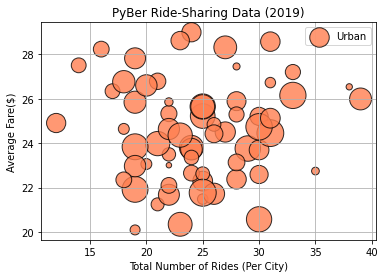

In [12]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_totals, urban_avg_fare, color="coral", alpha =0.8, s=[i * 10 for i in urban_avg_driver_count], label="Urban",edgecolor="black")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#add a legend
plt.legend()
           

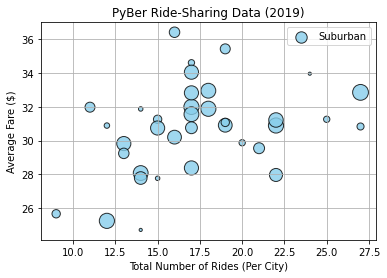

In [13]:
#create suburban cities bubble chart
plt.scatter(suburban_ride_totals,suburban_avg_fare, color ="skyblue", alpha =0.8, s= [i*10 for i in suburban_avg_driver_count], label= "Suburban",edgecolor ="black")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

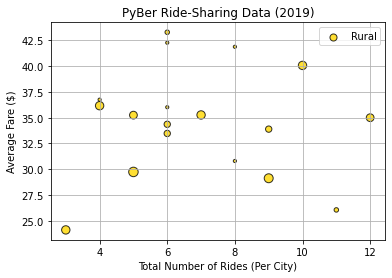

In [14]:
#create rurual cities bubble chart
plt.scatter(rural_ride_totals, rural_avg_fare, color="gold", alpha= 0.8, s=[i*10 for i in rural_avg_driver_count], edgecolor="black",label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

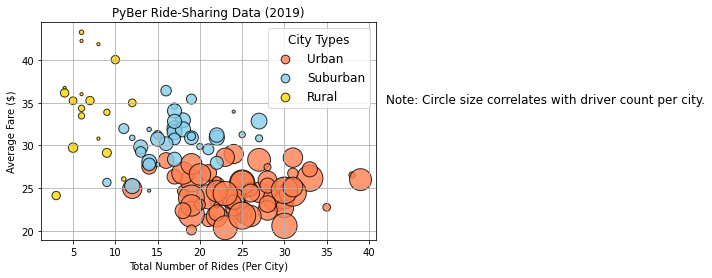

In [15]:
#merge all 3 charts
plt.scatter(urban_ride_totals, urban_avg_fare, color="coral", alpha =0.8, s=[i * 10 for i in urban_avg_driver_count], label="Urban",edgecolor="black")
plt.scatter(suburban_ride_totals,suburban_avg_fare, color ="skyblue", alpha =0.8, s= [i*10 for i in suburban_avg_driver_count], label= "Suburban",edgecolor ="black")
plt.scatter(rural_ride_totals, rural_avg_fare, color="gold", alpha= 0.8, s=[i*10 for i in rural_avg_driver_count], edgecolor="black",label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
#fix legend size
lgnd = plt.legend(fontsize= "12", mode="Expanded", scatterpoints=1, loc="best",title ="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")

In [16]:
#get summary statistics for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [17]:
#get summary statistics for suburban cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [18]:
#get summary statistics for rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [19]:
suburban_ride_totals.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [20]:
rural_ride_totals.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [21]:
urban_ride_totals.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [22]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_totals.mean(),2), round(suburban_ride_totals.mean(),2), round(rural_ride_totals.mean(),2)

(24.62, 17.36, 6.94)

In [23]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_totals = np.mean(urban_ride_totals)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_totals:.2f}.")

median_urban_ride_totals = np.median(urban_ride_totals)
print(f"The median for the ride counts for urban trips is {median_urban_ride_totals}.")

mode_urban_ride_totals = sts.mode(urban_ride_totals)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_totals}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [24]:
mode_suburban_ride_totals = sts.mode(suburban_ride_totals)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_totals}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [25]:
mode_rural_ride_totals = sts.mode(rural_ride_totals)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_totals}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [26]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [27]:
#get the mean using numpy
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare for urban trips is {mean_urban_fares}")
#get the median using numpy
median_urban_fares = np.median(urban_fares)
print(f"The median fare for urban trips is {median_urban_fares}")
#get the mode using numpy
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}")

The mean fare for urban trips is 24.52577230769236
The median fare for urban trips is 24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [28]:
suburban_fares = suburban_cities_df["fare"]
#get the mean using numpy
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare for suburban trips is {mean_suburban_fares}")
#get the median using numpy
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare for suburban trips is {median_suburban_fares}")
#get the mode using numpy
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}")

The mean fare for suburban trips is 30.97012800000002
The median fare for suburban trips is 30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [29]:
rural_fares = rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare for rural cities is {mean_rural_fares}")

The mean fare for rural cities is 34.623440000000016


In [30]:
#create series for each driver count 
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [31]:
mean_suburban_drivers = np.mean(suburban_drivers)
mean_suburban_drivers 

13.712

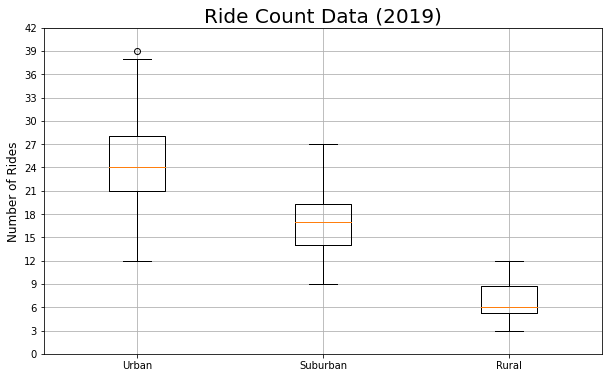

In [32]:
#create a box and whisker plot for urban cities ride totals
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_totals, suburban_ride_totals, rural_ride_totals]
fig,ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_count_data, labels = x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize =20)
ax.set_ylabel('Number of Rides', fontsize = 12)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()



In [33]:
#find the urban city outlier
urban_city_outlier = urban_ride_totals[urban_ride_totals == 39].index[0]
urban_city_outlier

'West Angela'

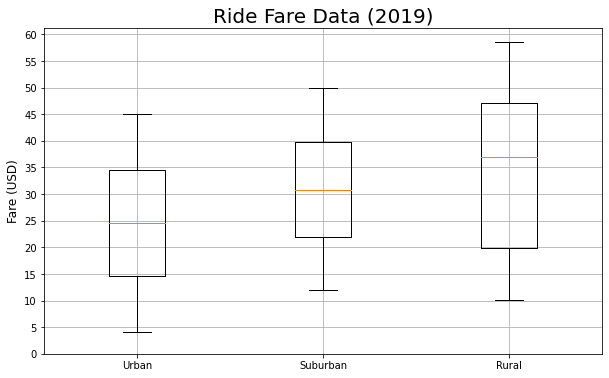

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [46]:
# Create a box and whisker plot for fare data 
fig, ax= plt.subplots(figsize=(10,6))
all_fare_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(all_fare_data, labels = x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_yticks(np.arange(0,61,step=5))
ax.set_ylabel("Fare (USD)", fontsize=12)
ax.grid()
plt.show()
fig.savefig("analysis/Fig3")
print("Summary Statistics")
urban_fares.describe()

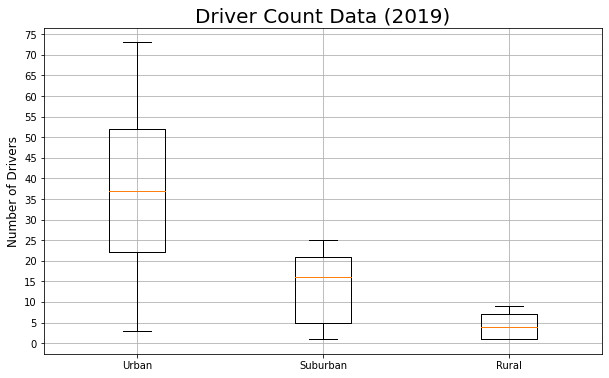

In [47]:
#Create a box and whisker plot for driver data 
x_labels = ["Urban", "Suburban", "Rural"]
all_drivers = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(all_drivers, labels=x_labels)
ax.set_title("Driver Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=12)
ax.set_yticks(np.arange(0,76,step=5))
plt.grid()
plt.show()
              